In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def plotimg(img):
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=[15,15])
    plt.imshow(img, cmap = 'gray')
    
    plt.xticks([]),plt.yticks([])
    plt.show()



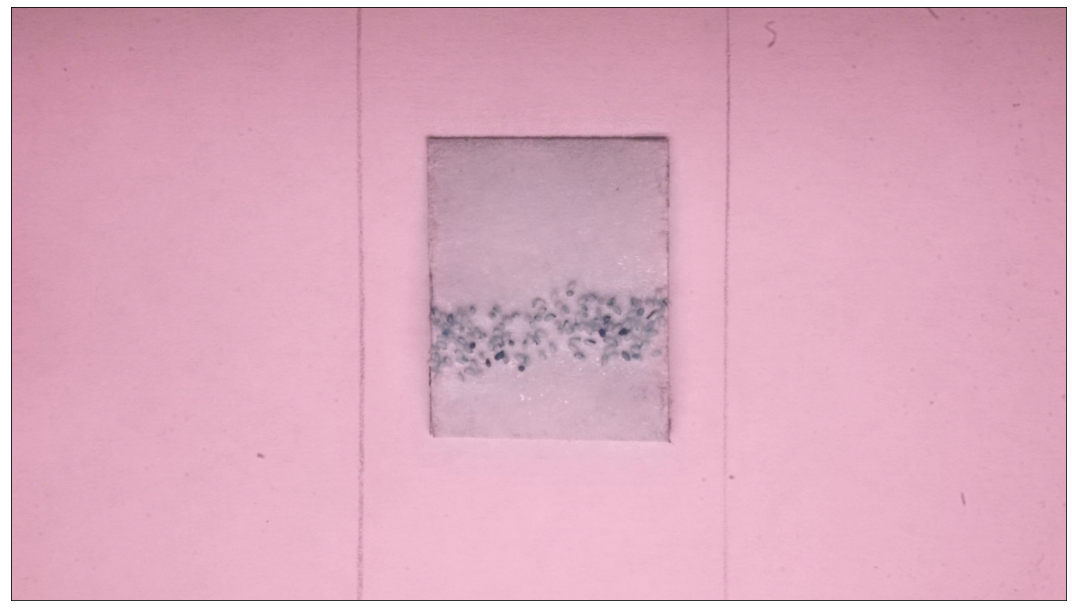

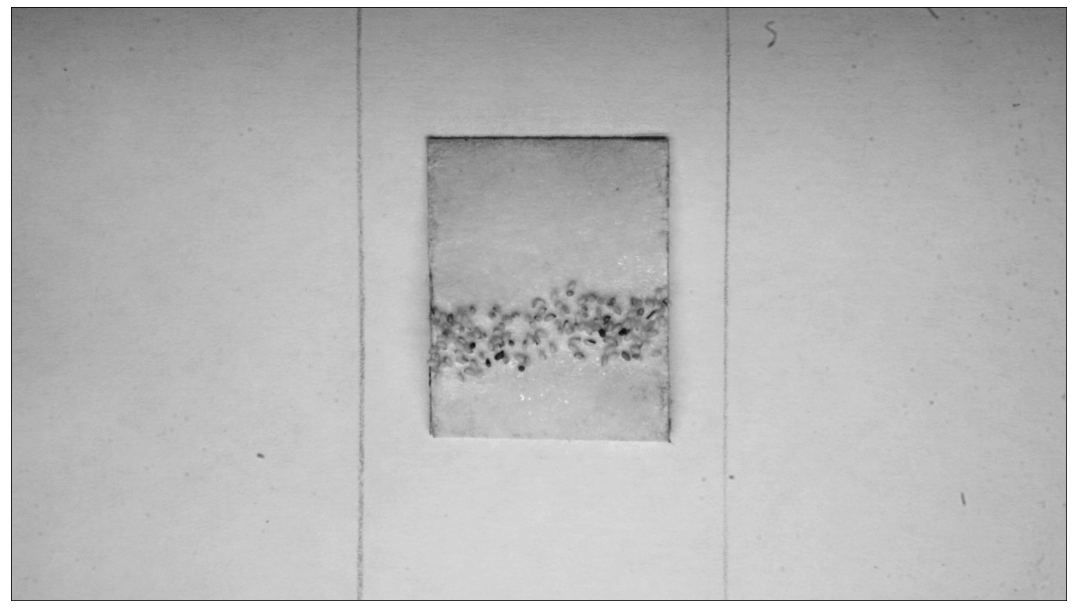

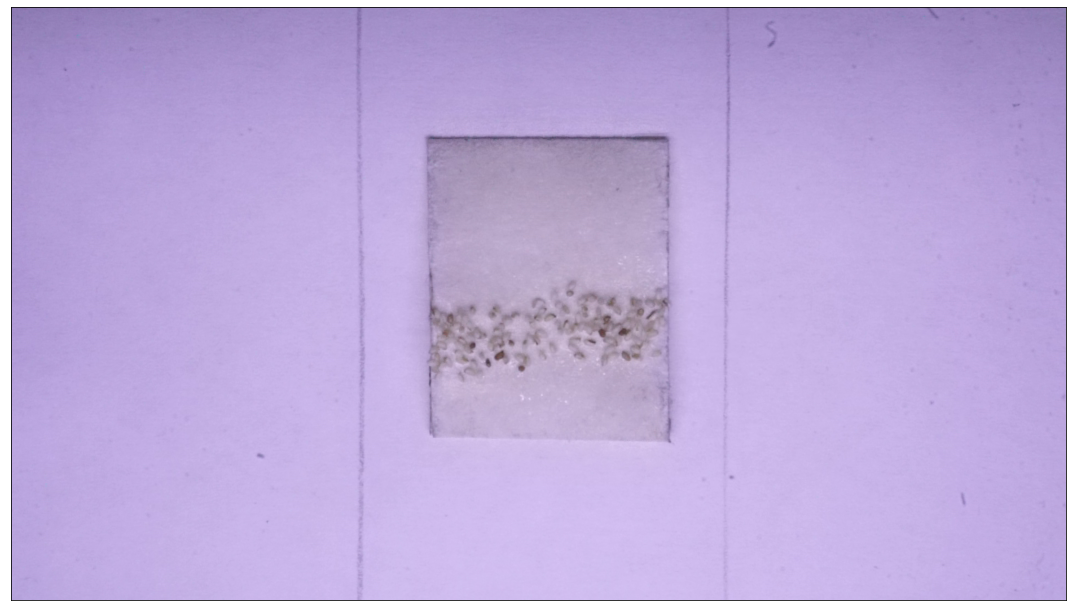

In [4]:
img_b = cv2.imread("Frames2/frame2.png")
img_gray_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)
img_color_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)
plotimg(img_b) #BGR
plotimg(img_gray_b) #GrayScale
plotimg(img_color_b) #RGB

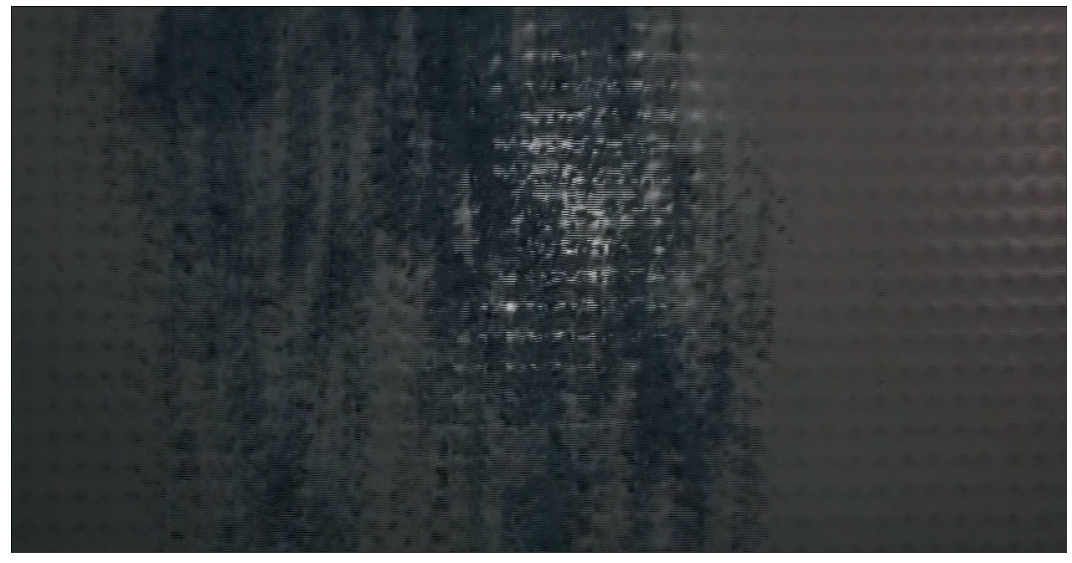

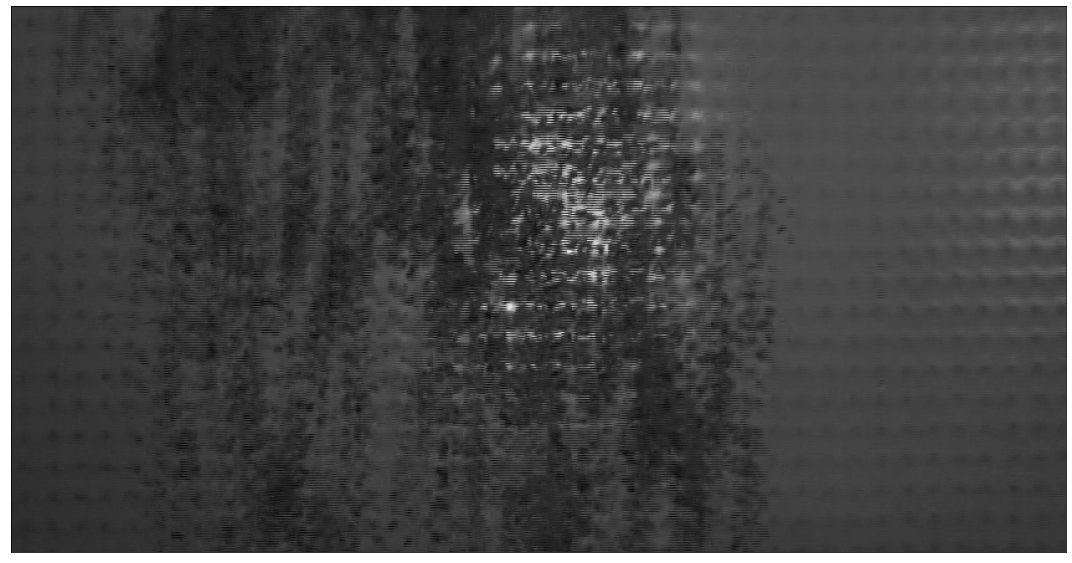

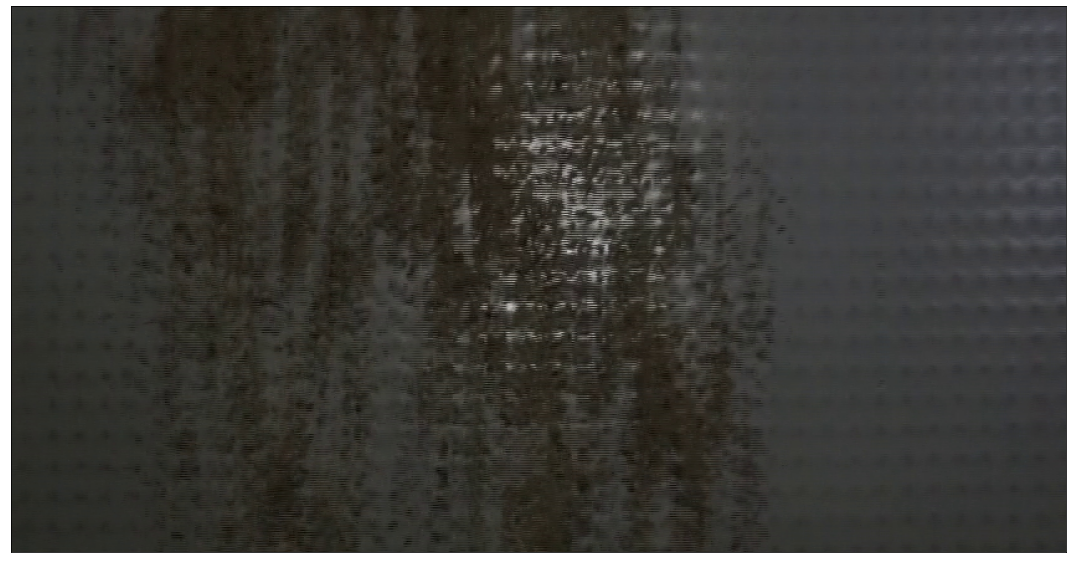

In [21]:
img = cv2.imread("../Frame_cut/58.bmp")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plotimg(img) #BGR
plotimg(img_gray) #GrayScale
plotimg(img_color) #RGB

In [9]:
img_color.shape

(440, 850, 3)

In [22]:
for row in range(img_color.shape[0]):
    if row % 2 == 1:
        img_color[row,:] = img_color[row-1,:]

In [31]:
kernel = np.array([1,1]).T
print(kernel)
blur = cv2.filter2D(img_color,-1,kernel)


[1 1]


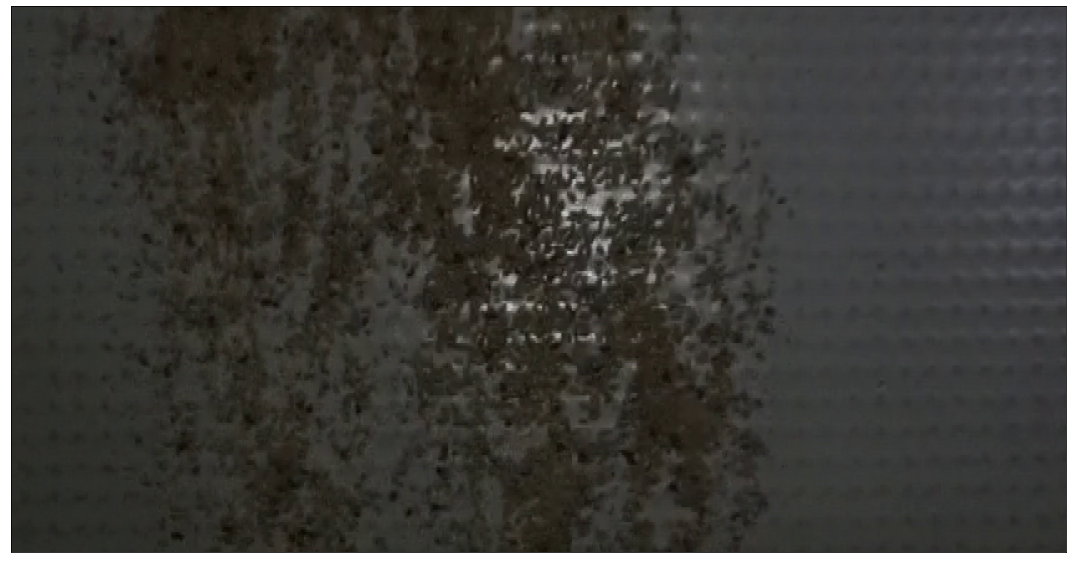

In [32]:
plotimg(img_color)

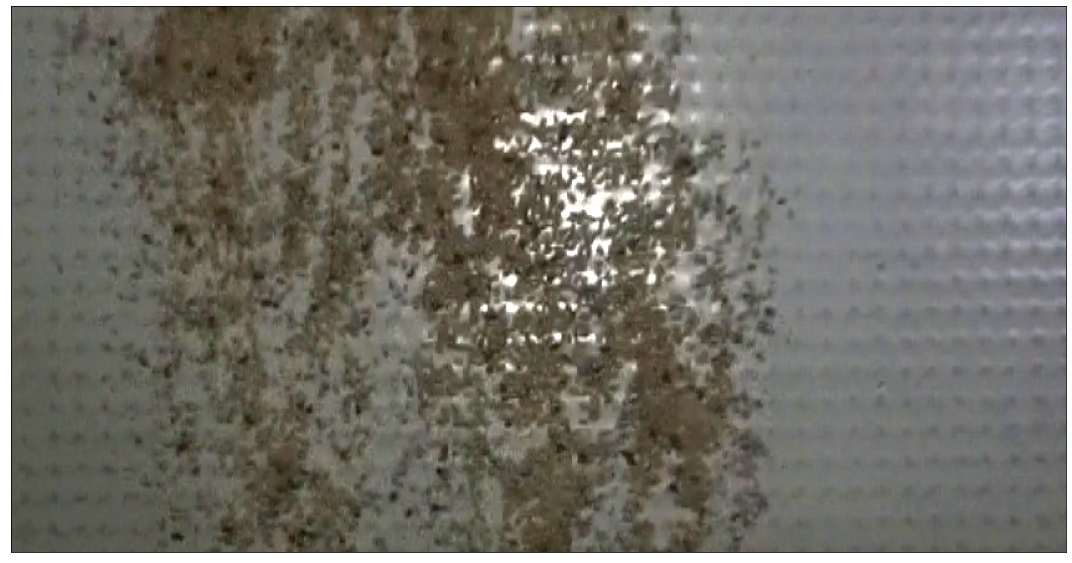

In [33]:
plotimg(blur)

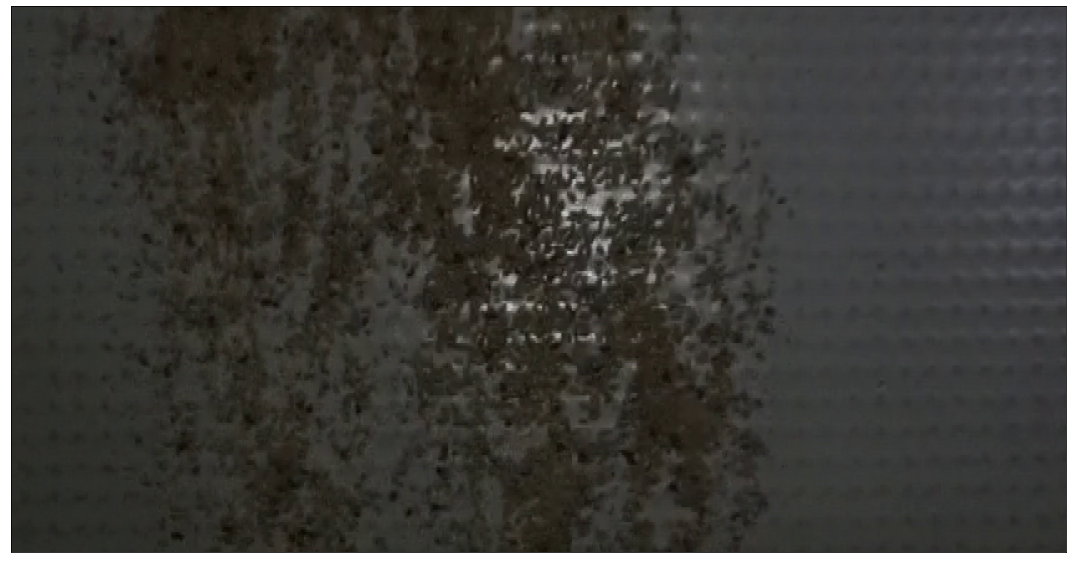

In [26]:
plotimg(img_color)

In [3]:
#Tamaño de recortes
img_color_b.shape

(1080, 1920, 3)

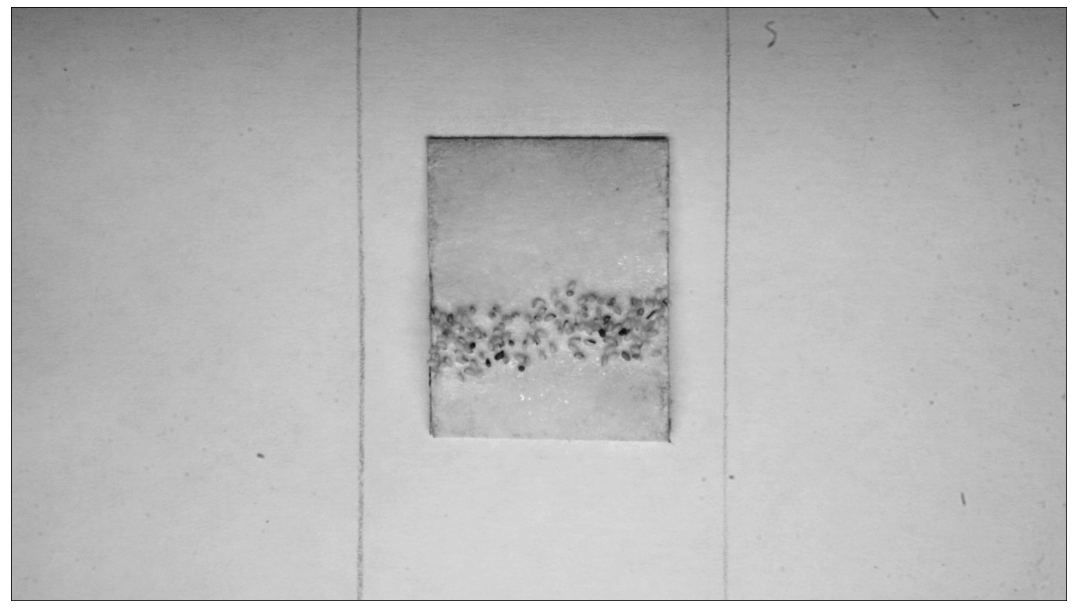

In [4]:
plotimg(img_gray_b)

<Figure size 432x288 with 0 Axes>

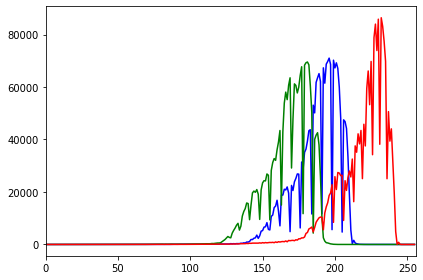

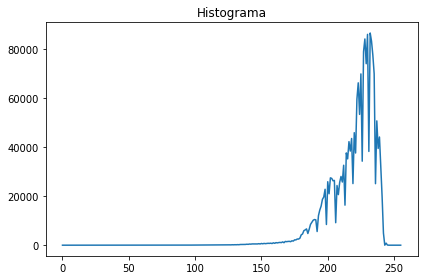

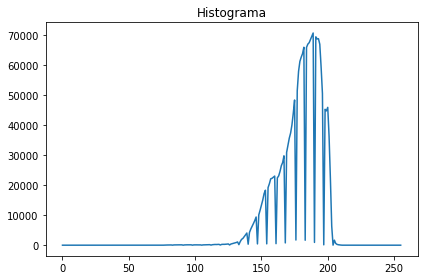

<Figure size 432x288 with 0 Axes>

In [5]:
#img_b = cv2.imread("Frames/frame2.png")
#img_gray_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)
#img_color_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB)

#Histograma de colores
hist1 = cv2.calcHist([img_b],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img_gray_b],[0],None,[256],[0,256])
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img_color_b], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.figure()

plt.plot(hist1),plt.title("Histograma")
plt.figure()
plt.plot(hist2),plt.title("Histograma")
plt.figure()



<Figure size 432x288 with 0 Axes>

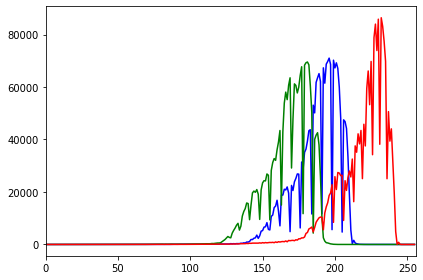

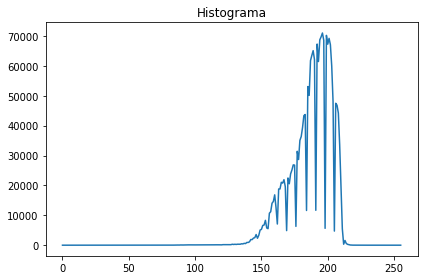

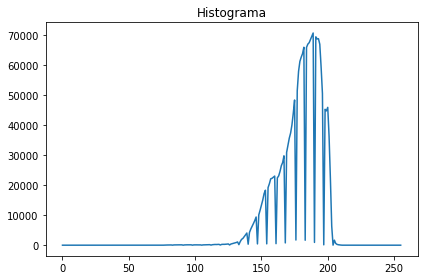

<Figure size 432x288 with 0 Axes>

In [6]:


#Histograma de colores
hist1 = cv2.calcHist([img_color_b],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img_gray_b],[0],None,[256],[0,256])

color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img_color_b], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.figure()
plt.plot(hist1),plt.title("Histograma")
plt.figure()
plt.plot(hist2),plt.title("Histograma")
plt.figure()


<Figure size 432x288 with 0 Axes>

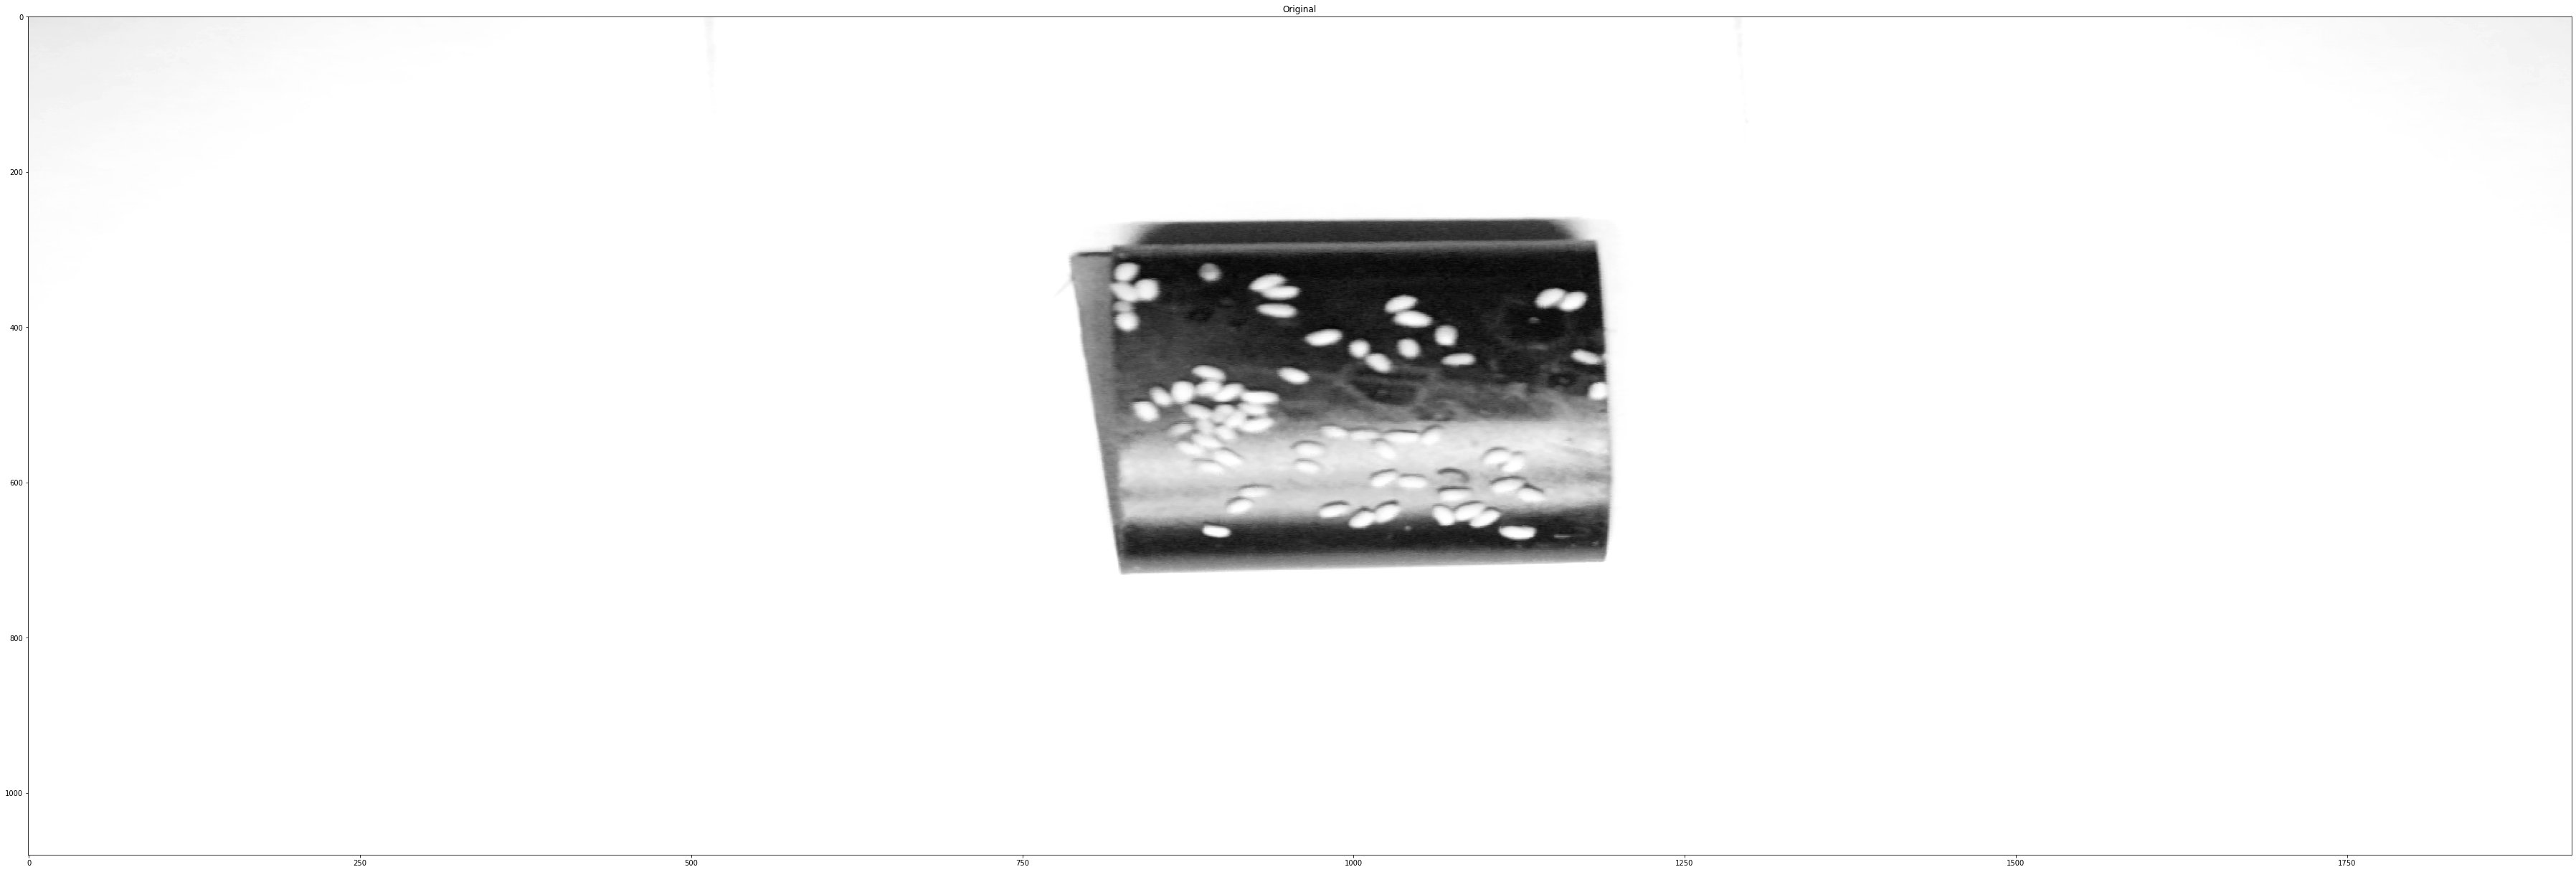

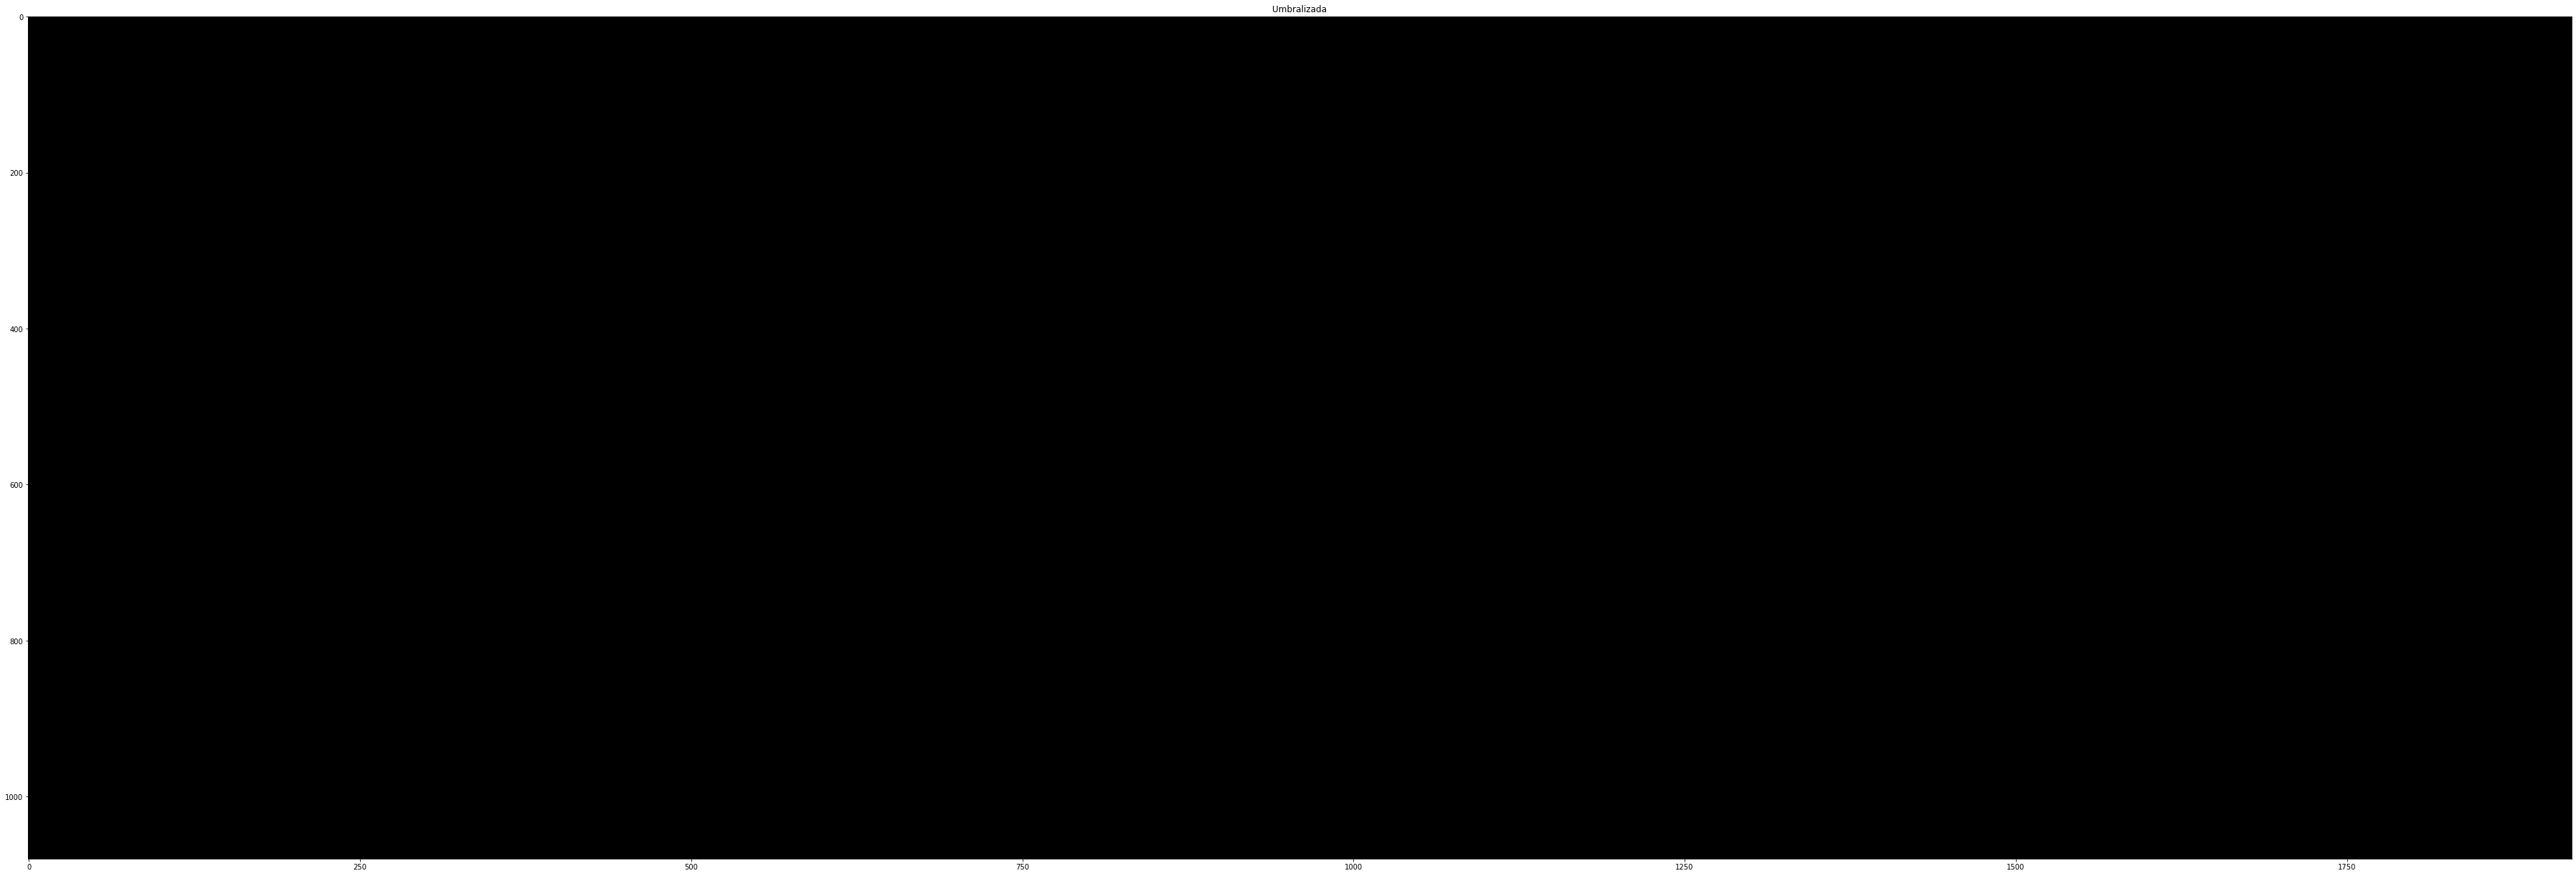

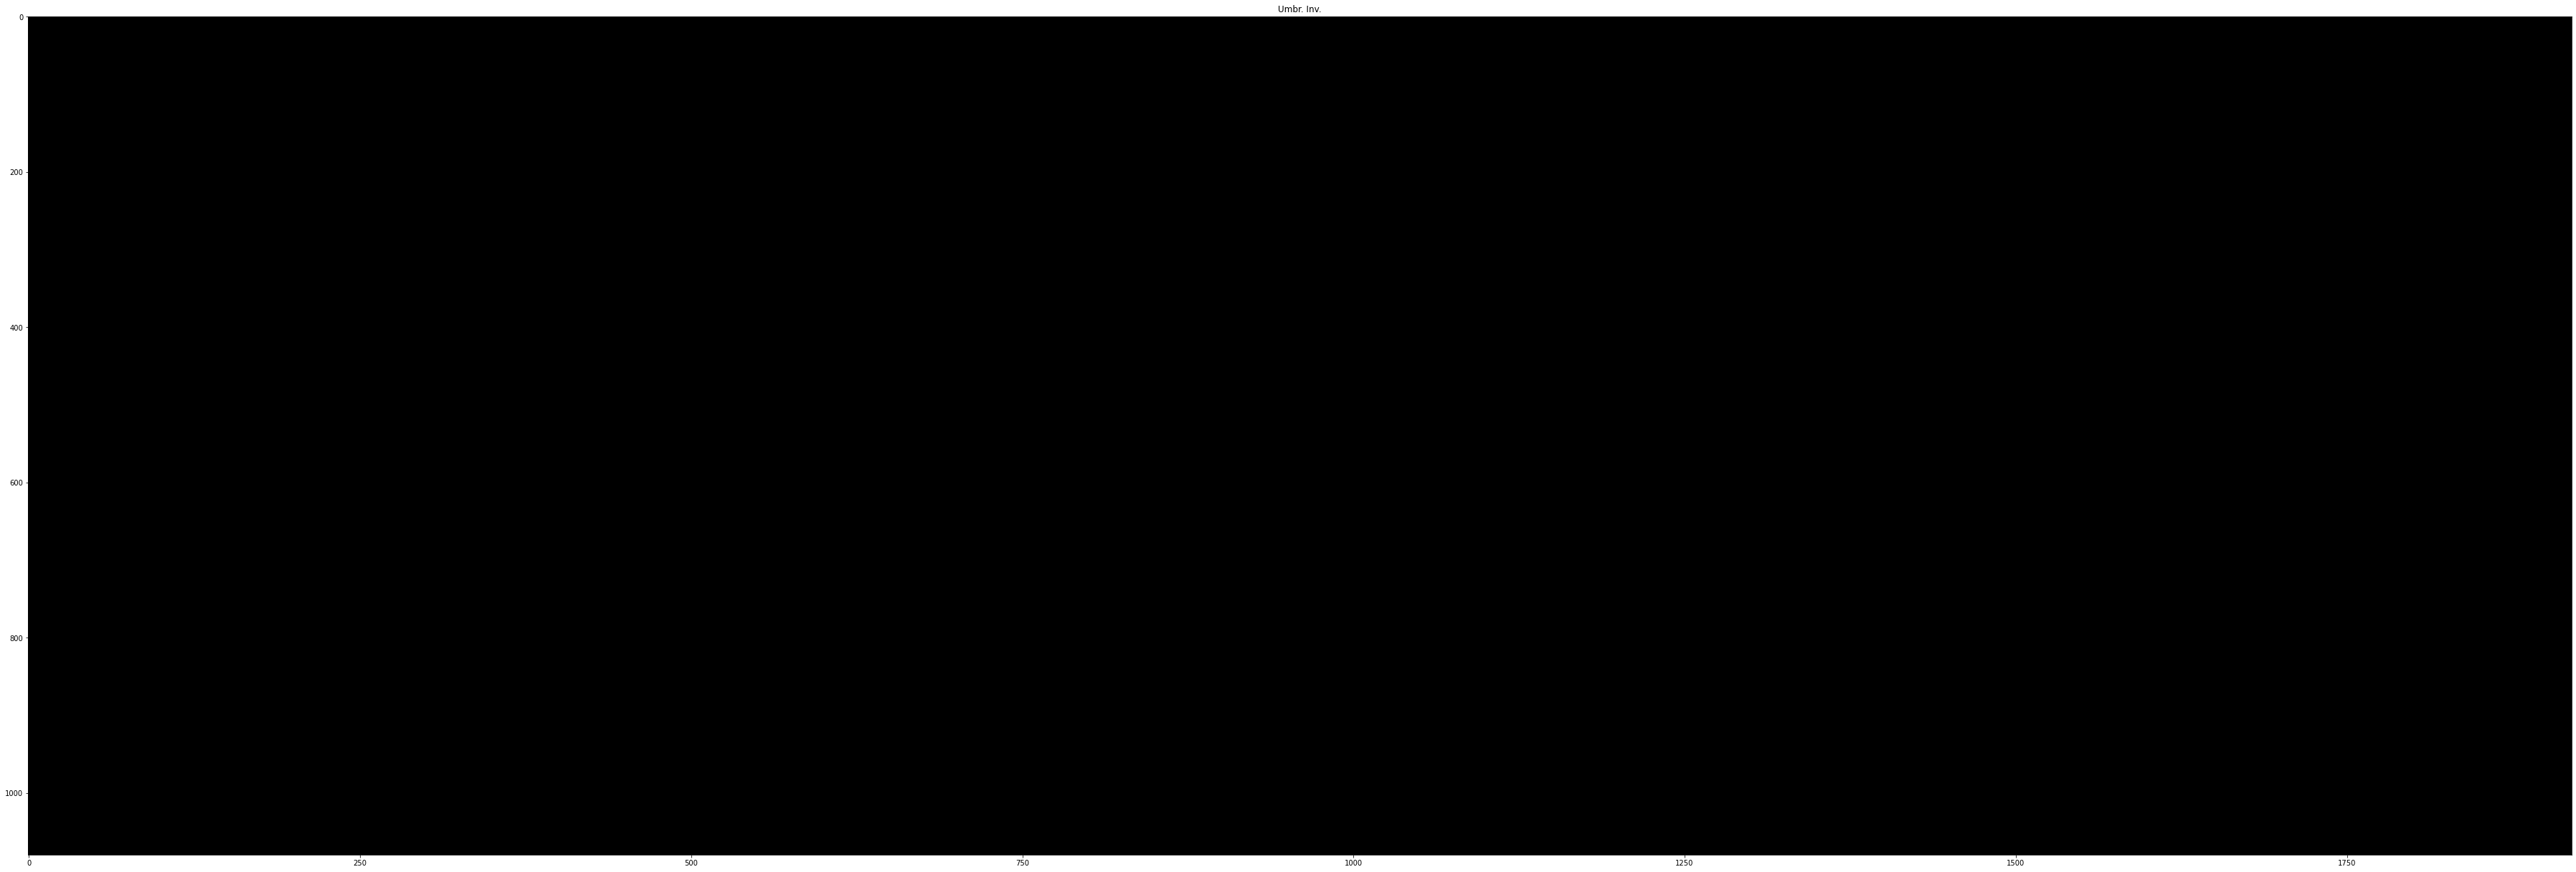

<Figure size 3600x3600 with 0 Axes>

In [32]:
width, height = img_gray_b.shape[:2]
img_umbral = np.zeros((width,height), np.uint8)
img_umbral_inv = np.zeros((width,height), np.uint8)
IGMax=0
IGmin=1000000

#DIVISION POR UNA CONSTANTE
H=200 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img_gray_b[i,j] < H : 
            img_umbral[i,j] = 255
            img_umbral_inv[i,j] = 0
        else : 
            img_umbral[i,j] = 255
            img_umbral_inv[i,j] = 0
        if img_gray_b[i,j] > IGMax: IGMax = img_gray_b[i,j]
        if img_gray_b[i,j] < IGmin: IGmin = img_gray_b[i,j]


#Visualizacion resulatado 
plt.figure(1)
plt.figure(figsize = (50,50))
plt.subplot(311), plt.imshow(img_gray_b, cmap='gray', aspect='auto'), plt.title('Original'), plt.figure(figsize = (50,50))
plt.subplot(312), plt.imshow(img_umbral, cmap='gray',aspect='auto'), plt.title('Umbralizada'),plt.figure(figsize = (50,50))
plt.subplot(313), plt.imshow(img_umbral_inv, cmap='gray',aspect='auto'), plt.title('Umbr. Inv.'),plt.figure(figsize = (50,50))
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

In [33]:
thresh3 = cv2.adaptiveThreshold(img_gray_b, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 13, 5)


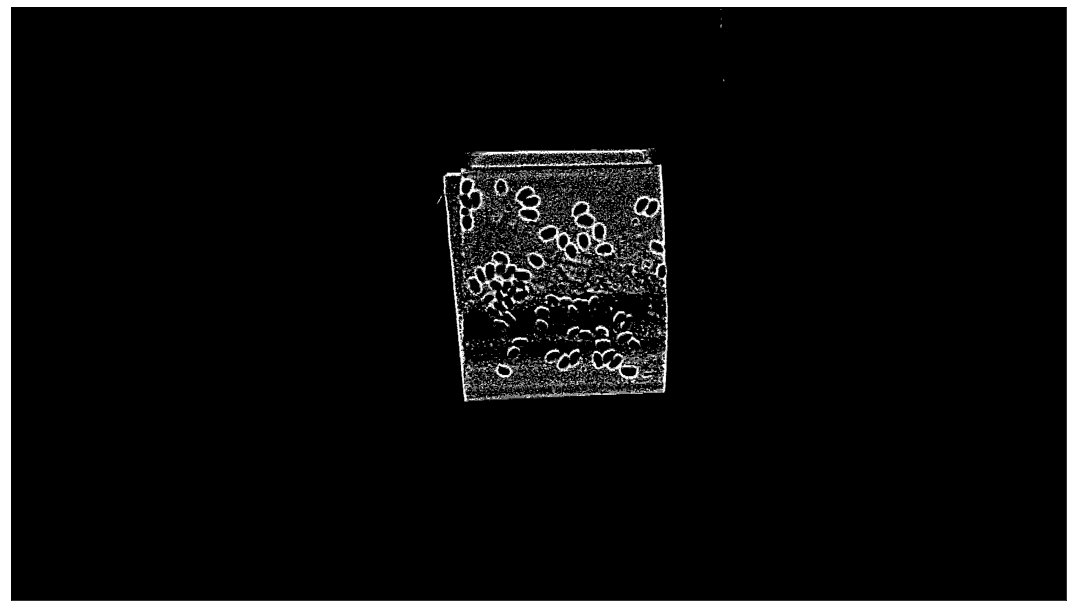

In [34]:
plotimg(thresh3)

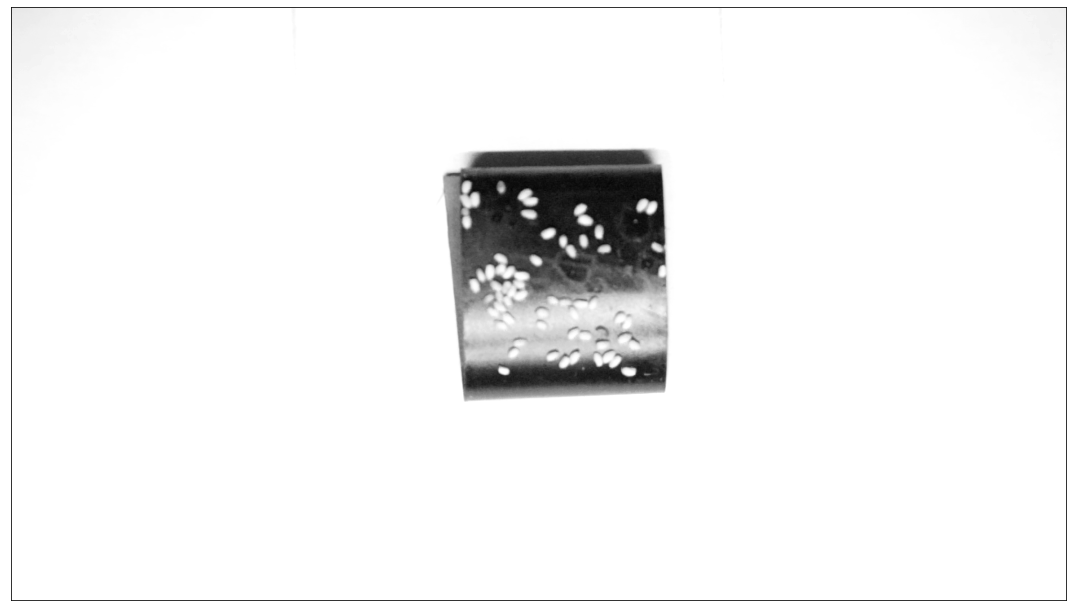

In [53]:
plotimg(img_gray_b)

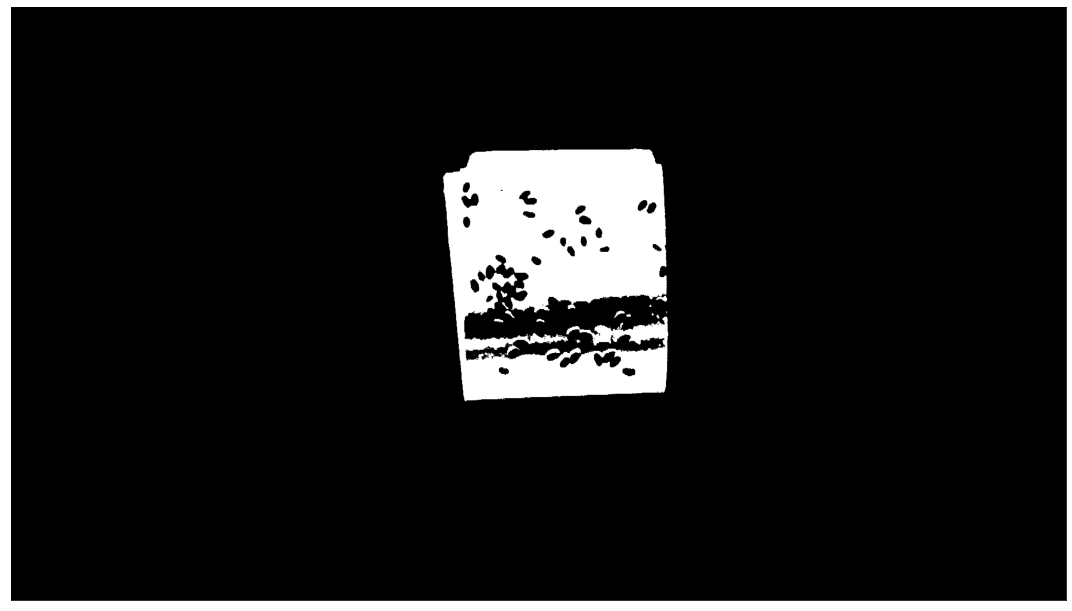

In [99]:
# funciona para 200
ret,th1 = cv2.threshold(img_gray_b,205,255,cv2.THRESH_BINARY_INV)
plotimg(th1)

In [85]:
th1.shape

(1080, 1920)

In [93]:
c = np.zeros((th1.shape))
for i in range(th1.shape[0]):
    for j in range(th1.shape[1]):
        a = 255-th1[i][j]
        b = thresh3[i][j]
        c[i][j] = 0 if a*b > 255 else 255

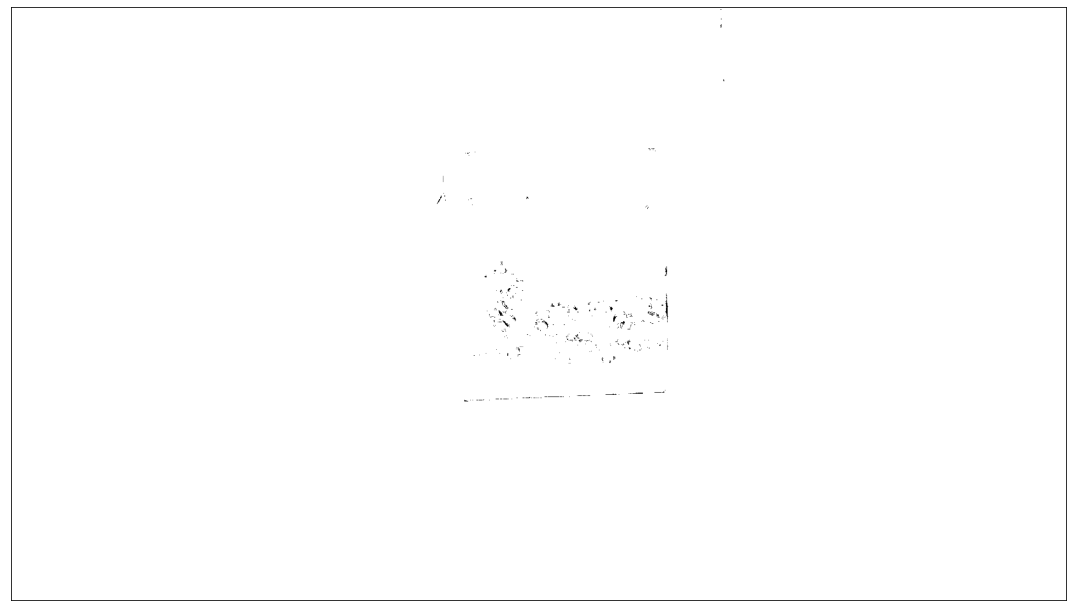

In [94]:
plotimg(c)

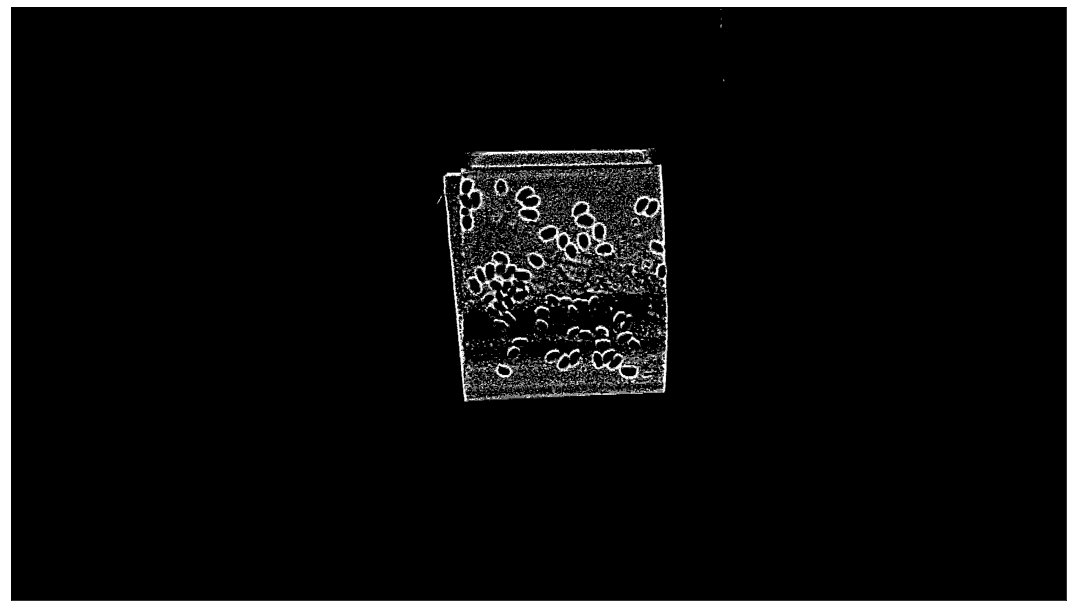

In [81]:
plotimg(thresh3)

In [96]:
img_gray_b

array([[232, 232, 230, ..., 240, 240, 239],
       [230, 232, 230, ..., 240, 239, 240],
       [232, 232, 232, ..., 239, 239, 239],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [142]:
a = np.where(img_gray_b> 200, 0,255)


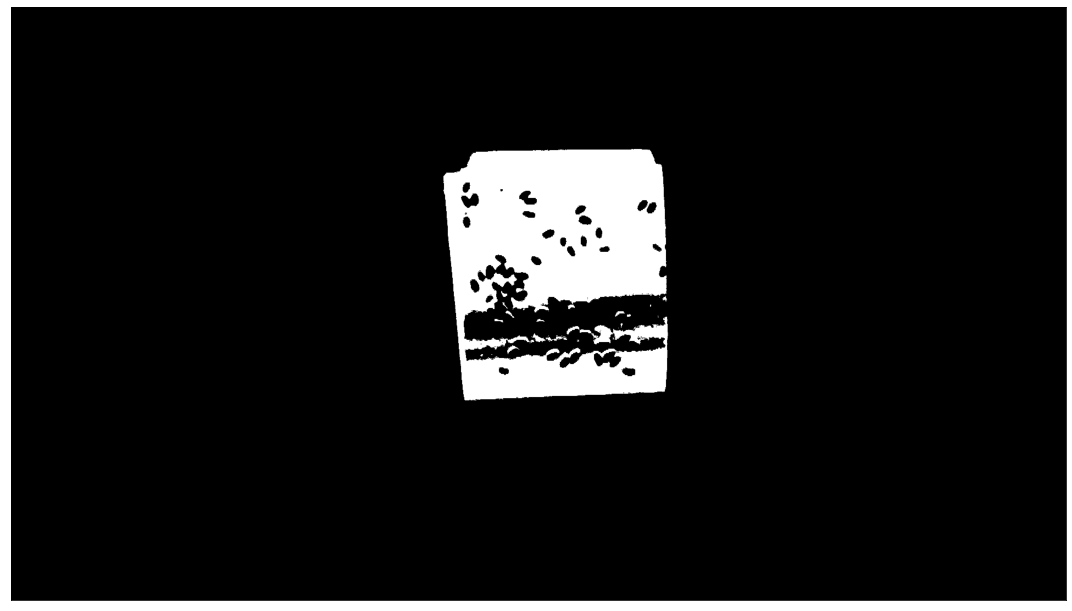

In [143]:
plotimg(a)

In [27]:
b = np.where(img_gray_b < 110, 0,255)
ret,th1 = cv2.threshold(img_gray_b,110,255,cv2.THRESH_BINARY_INV)

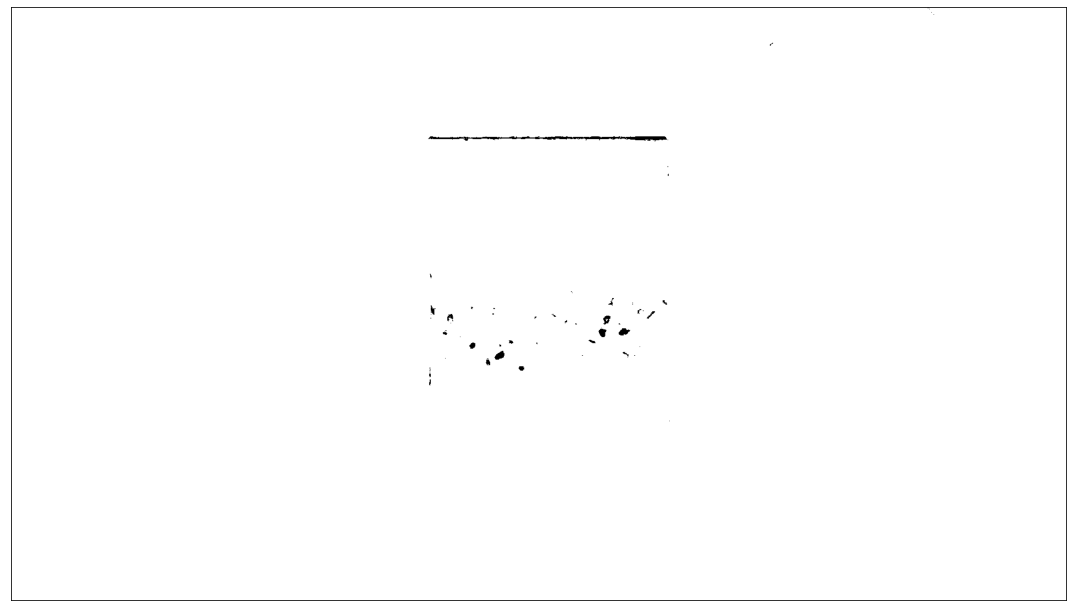

In [28]:
plotimg(b)

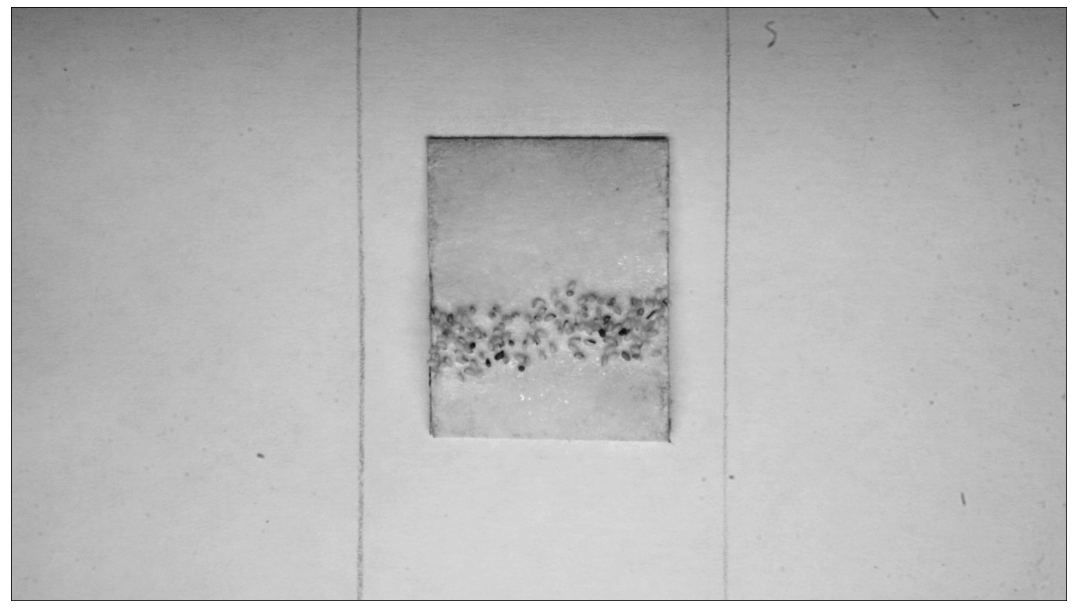

In [11]:
plotimg(img_gray_b)

In [31]:
type(img_gray_b)

numpy.ndarray

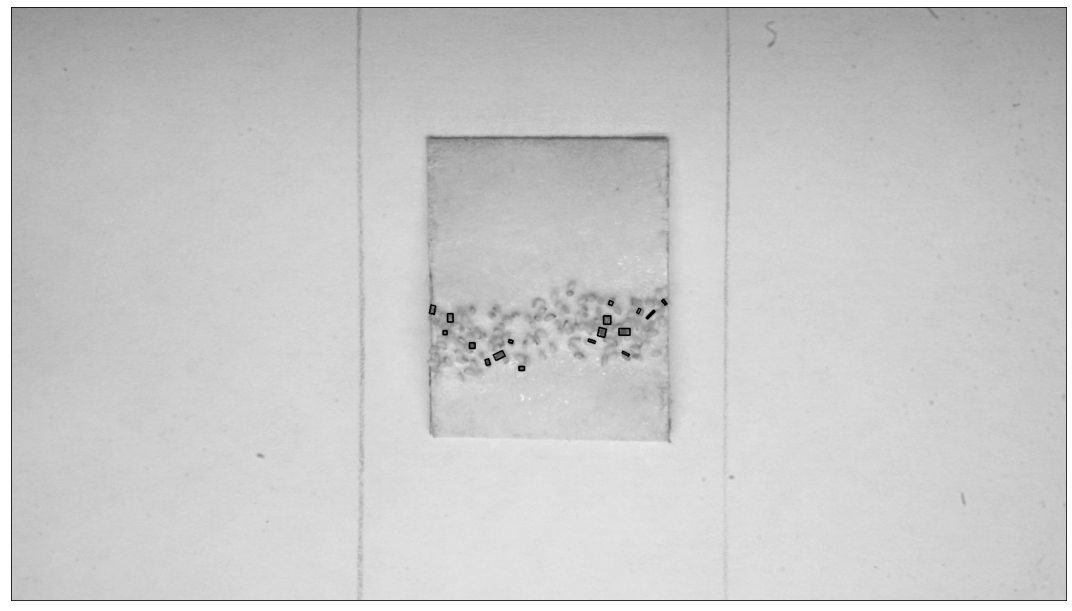

In [76]:
# Encuentra los contornos 
contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

outer_contours = []
src_color = img_gray_b.copy()
color_copy = src_color.copy()

# Seleccionar solo los contornos que no tienen padres por nivel de jerarquia
for i in range(len(hierarchy[0])):
    if hierarchy[0,i,3] < 1:
        outer_contours.append(contours[i])
    else:
        continue

rects = []
h_max = 0
w_max = 0

for i in range(len(outer_contours)):
    
    # Obtengo el centro del contorno, largo y alto, y ángulo
    rect = cv2.minAreaRect(outer_contours[i])
    # obtengo representación en puntos
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    x ,y ,w, h = area(box)
    
    # Selecciona los contornos que cumplen ciertas condiciones
    if (w*h >= src_color.shape[0]*src_color.shape[1]) or w*h < 35 or w*h > 300:
        continue
    else:
        #Dibuja los contornos de los elementos encontrados
        cv2.drawContours(src_color,[box],0,(0,255,0),2)
        rect = cv2.minAreaRect(outer_contours[i])
        w,h = rect[1]
        x,y = rect[0]
        if w+x > w_max:
            w_max = w+x
        elif y+h > h_max:
            h_max = h+y
        rects.append(rect)
plotimg(src_color)

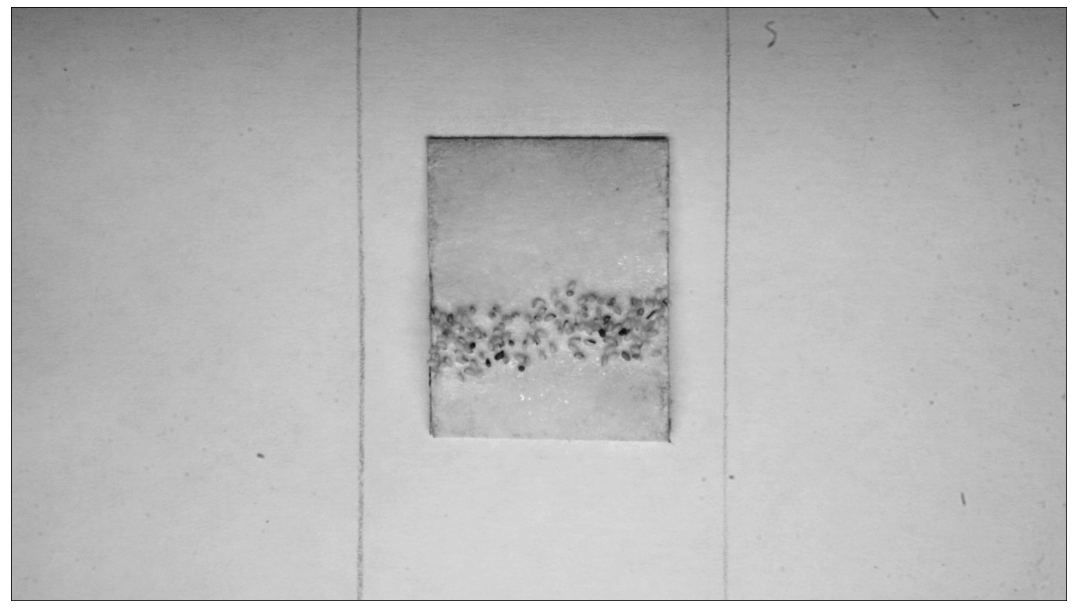

In [75]:
plotimg(img_gray_b)

In [68]:
#Crop de Imagenes 


#Funcion para calcular W y H
def area(box):
    x = box[0,1]
    y = box[0,0]
    dx1 = box[0,1]-box[3,1]
    dy1 = box[0,0]-box[3,0]
    dx2 = box[0,1]-box[1,1]
    dy2 = box[0,0]-box[1,0]
    w   = (dx1**2+dy1**2)**(1/2)
    h   = (dx2**2+dy2**2)**(1/2)
    return x,y,w,h